# Week 2
## choose features and observations, make some statistics and calculations for understanding dataset

In [1]:
# import necessary modules
import pandas as pd
import numpy as np

In [2]:
# load NASA Global Martian Crater Database into `nasa_df` dataframe
nasa_df = pd.read_csv('marscrater_pds.csv')

# print head of `nasa_df` 
nasa_df.head()

,﻿CRATER_ID,CRATER_NAME,LATITUDE_CIRCLE_IMAGE,LONGITUDE_CIRCLE_IMAGE,DIAM_CIRCLE_IMAGE,DEPTH_RIMFLOOR_TOPOG,MORPHOLOGY_EJECTA_1,MORPHOLOGY_EJECTA_2,MORPHOLOGY_EJECTA_3,NUMBER_LAYERS
0,01-000000,,84.367,108.746,82.10,0.22,,,,0
1,01-000001,Korolev,72.760,164.464,82.02,1.97,Rd/MLERS,HuBL,,3
2,01-000002,,69.244,-27.240,79.63,0.09,,,,0
3,01-000003,,70.107,160.575,74.81,0.13,,,,0
4,01-000004,,77.996,95.617,73.53,0.11,,,,0


In [3]:
# repair broken label `CRATER_ID` in the original dataset
cols = list(nasa_df.columns)
cols[0] = 'CRATER_ID'
nasa_df.columns = cols

### Step 1. Extract fields from original dataset  which need for our resarch:
- CRATER_ID
- LATITUDE_CIRCLE_IMAGE
- LATITUDE_CIRCLE_IMAGE
- DIAM_CIRCLE_IMAGE
- DEPTH_RIMFLOOR_TOPOG

In [4]:
# create new dataframe `data` from `nasa_df`
data = nasa_df[['CRATER_ID', 'LATITUDE_CIRCLE_IMAGE', 'LATITUDE_CIRCLE_IMAGE', 
         'DIAM_CIRCLE_IMAGE', 'DEPTH_RIMFLOOR_TOPOG']]
data.head()

,CRATER_ID,LATITUDE_CIRCLE_IMAGE,LATITUDE_CIRCLE_IMAGE,DIAM_CIRCLE_IMAGE,DEPTH_RIMFLOOR_TOPOG
0,01-000000,84.367,84.367,82.10,0.22
1,01-000001,72.760,72.760,82.02,1.97
2,01-000002,69.244,69.244,79.63,0.09
3,01-000003,70.107,70.107,74.81,0.13
4,01-000004,77.996,77.996,73.53,0.11


## Step 2. Make descriptive statistics and clean dataset

In [5]:
# check for positive diameter and depth
print 'QTY of bad diameters = ',data[data['DIAM_CIRCLE_IMAGE'] <= 0]['DIAM_CIRCLE_IMAGE'].count()
print 'QTY of bad depth = ',data[data['DEPTH_RIMFLOOR_TOPOG'] <= 0]['DEPTH_RIMFLOOR_TOPOG'].count()

QTY of bad diameters =  0
QTY of bad depth =  307539


### We see too many `'bad'` magnitudes of the crater depth. Let's look at this column more carefully


In [6]:
# count negative depth
print 'QTY of negstive depth = ',data[data['DEPTH_RIMFLOOR_TOPOG'] < 0]['DEPTH_RIMFLOOR_TOPOG'].count()

# count zero-value depth
print 'QTY of negative depth = ',data[data['DEPTH_RIMFLOOR_TOPOG'] == 0]['DEPTH_RIMFLOOR_TOPOG'].count()

QTY of negstive depth =  10
QTY of negative depth =  307529


### Craters with negative & zero depth are hills or undefined and we have to exclude this observations from research

In [7]:
# store indexes of raw with negative  and zero depth
negative_zero_indexes = list(data[data['DEPTH_RIMFLOOR_TOPOG'] <= 0 ].index)

# remove this raw from `data`
data = data.drop(negative_zero_indexes)

print 'QTY of zero/negative depth = ',data[data['DEPTH_RIMFLOOR_TOPOG'] <= 0]['DEPTH_RIMFLOOR_TOPOG'].count()

QTY of zero/negative depth =  0


### Quantiles below show  that  90% of craters belong to `not extra large` craters which conform `Newton’s approximation for the impact depth` (  [see CodeBook](https://github.com/sergei8/mars-craters/blob/master/Mars_Surface_Study.pdf) ) .

In [8]:
data[['DIAM_CIRCLE_IMAGE','DEPTH_RIMFLOOR_TOPOG']].quantile(np.arange(0, 1, .1))

,DIAM_CIRCLE_IMAGE,DEPTH_RIMFLOOR_TOPOG
0.0,1.060,0.01
0.1,2.550,0.06
0.2,3.320,0.10
0.3,3.890,0.14
0.4,4.720,0.20
0.5,5.880,0.27
0.6,7.560,0.35
0.7,10.160,0.46
0.8,14.860,0.60
0.9,24.917,0.84


In [9]:
# some usefull statistics
data[['DIAM_CIRCLE_IMAGE','DEPTH_RIMFLOOR_TOPOG']].describe()

,DIAM_CIRCLE_IMAGE,DEPTH_RIMFLOOR_TOPOG
count,76804.000000,76804.000000
mean,11.061201,0.379514
std,15.619762,0.360978
min,1.060000,0.010000
25%,3.580000,0.120000
50%,5.880000,0.270000
75%,12.150000,0.520000
max,512.750000,4.950000


In [10]:
# remove all raws with diameter > 50km (extra large meteors/craters)
data = data.drop(data[data.DIAM_CIRCLE_IMAGE > 50].index)

### Make a new column: Depth / Diameter which we will use for analyse.

In [11]:
data['DEPTH_DIAM_RATIO'] = data['DEPTH_RIMFLOOR_TOPOG'] / data['DIAM_CIRCLE_IMAGE']
data.head()

,CRATER_ID,LATITUDE_CIRCLE_IMAGE,LATITUDE_CIRCLE_IMAGE,DIAM_CIRCLE_IMAGE,DEPTH_RIMFLOOR_TOPOG,DEPTH_DIAM_RATIO
13,01-000013,72.260,72.260,49.78,0.16,0.003214
14,01-000014,65.603,65.603,49.43,0.14,0.002832
15,01-000015,84.687,84.687,48.84,1.06,0.021704
16,01-000016,65.646,65.646,48.44,0.09,0.001858
17,01-000017,65.817,65.817,47.20,0.04,0.000847


In [12]:
data['DEPTH_DIAM_RATIO'].describe()

count    74803.000000
mean         0.052089
std          0.039416
min          0.000249
25%          0.019330
50%          0.039832
75%          0.080836
max          0.230769
Name: DEPTH_DIAM_RATIO, dtype: float64

### Visualize and exploratory analyse of the dataset

In [13]:
import matplotlib.pylab as plt
%matplotlib inline

### Plot below show that real dependency has positive slope, but less then theoretical. It's because additional factors: surface erosion and soil density.

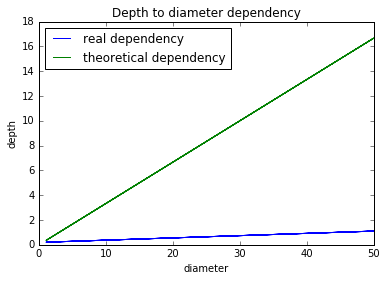

In [14]:
# find linear regression coefficients and plot it
coef = np.polyfit(data['DIAM_CIRCLE_IMAGE'],data['DEPTH_RIMFLOOR_TOPOG'], deg=1)
plt.plot(data['DIAM_CIRCLE_IMAGE'], coef[0] * data['DIAM_CIRCLE_IMAGE'] + coef[1], '-', label='real dependency' )

plt.plot(data['DIAM_CIRCLE_IMAGE'],data['DIAM_CIRCLE_IMAGE']/3.,'-', label='theoretical dependency')

plt.legend(loc=0)
plt.xlabel('diameter')
plt.ylabel('depth')
plt.title('Depth to diameter dependency')

plt.show()

### Show distribution of diameter and depth variables.

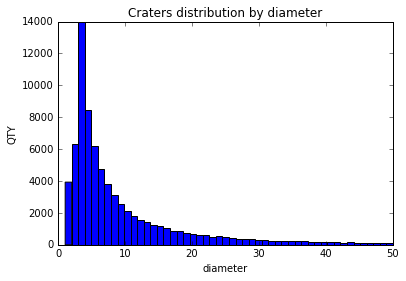

In [15]:
plt.hist(data['DIAM_CIRCLE_IMAGE'],bins=50)

plt.xlabel('diameter')
plt.ylabel('QTY')
plt.title('Craters distribution by diameter')

plt.show()

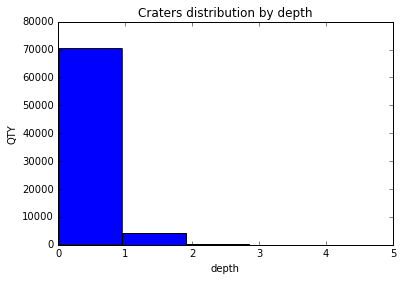

In [16]:
plt.hist(data['DEPTH_RIMFLOOR_TOPOG'],bins=5)
plt.xlabel('depth')
plt.ylabel('QTY')
plt.title('Craters distribution by depth')

plt.show()